# Introduction 

The actual MC/MD calculations show that columns of Al tend to form for the Mendelev potential, like a single column of the B2 phase. Let's quickly see where such an ideal structure fits on our 0K phase diagram.

In [1]:
from pyiron_feal import Project
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [2]:
pr = Project('projects/zerok')

In [15]:
pr.create.structure.FeAl.columnar_b2(planar_repeats=3).repeat(2).plot3d()

NGLWidget()

In [3]:
reps = np.arange(1, 6, dtype=int)
columnar_c_Al = [1 / len(pr.create.structure.FeAl.columnar_b2(planar_repeats=r)) for r in reps]  # 1 / (2 * reps**2)
columnar_energy = np.array([
    pr.zerok.get_columnar_b2_peratom_energy(planar_repeats=r) 
    for r in reps
])

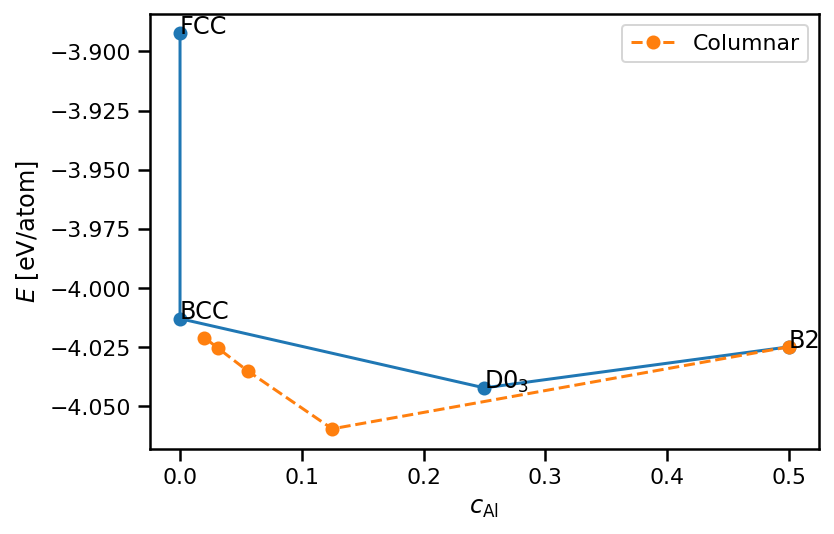

In [11]:
ax = pr.zerok.plot_phases_0K(relative=False)
ax.plot(columnar_c_Al, columnar_energy, label='Columnar', marker='o', linestyle='--')
plt.legend()
plt.show();

Ok, so D03 is just not stable in this potential. What happens around the 25% concentration? After playing around a bit, it looks like layers is the way to go:

In [17]:
pr.create.structure.FeAl.layered_Al(layers=3).repeat(3).plot3d()

NGLWidget()

In [12]:
layers = np.arange(1, 10, dtype=int)
layered_c_Al = [1 / len(pr.create.structure.FeAl.layered_Al(layers=l)) for l in layers]
layered_energy = np.array([
    pr.zerok.get_layered_peratom_energy(layers=l) 
    for l in layers
])

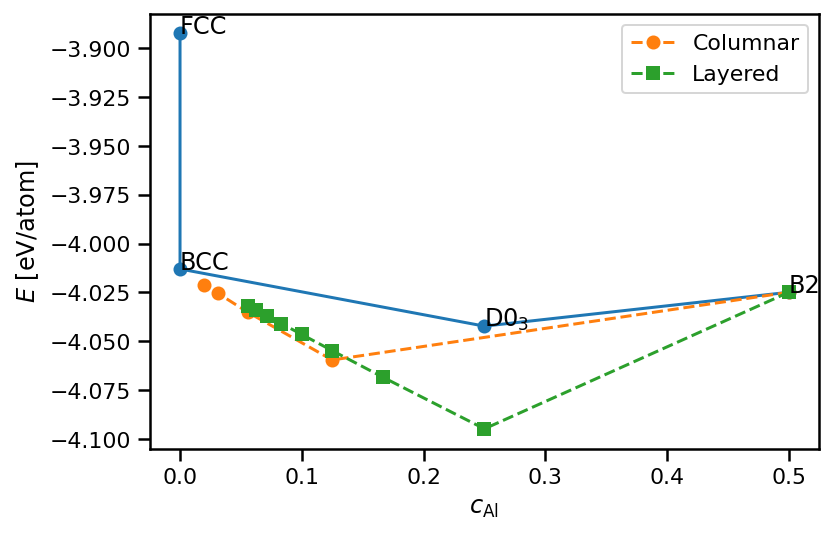

In [13]:
ax = pr.zerok.plot_phases_0K(relative=False)
ax.plot(columnar_c_Al, columnar_energy, label='Columnar', marker='o', linestyle='--')
ax.plot(layered_c_Al, layered_energy, label='Layered', marker='s', linestyle='--')
plt.legend()
plt.show();

Finally, let's also tack in the curve from non-interacting dilute point defects at the low concentration range, just to see how that compares. Remember that this is all ignoring entropy, even configurational entropy! Still, just knowing at each concentration the energetically favourable configurations gives a lot of insight into why I the amount of D03 *decreases* when I run MC/MD compared to a random structure.

In [20]:
dilute_conc = np.linspace(0, 0.1, 1000)
e_bcc = pr.zerok.get_bcc_peratom_energy()
de_Al = pr.zerok.get_dilute_formation_energy()[0]
dilute_energy = e_bcc + dilute_conc * de_Al

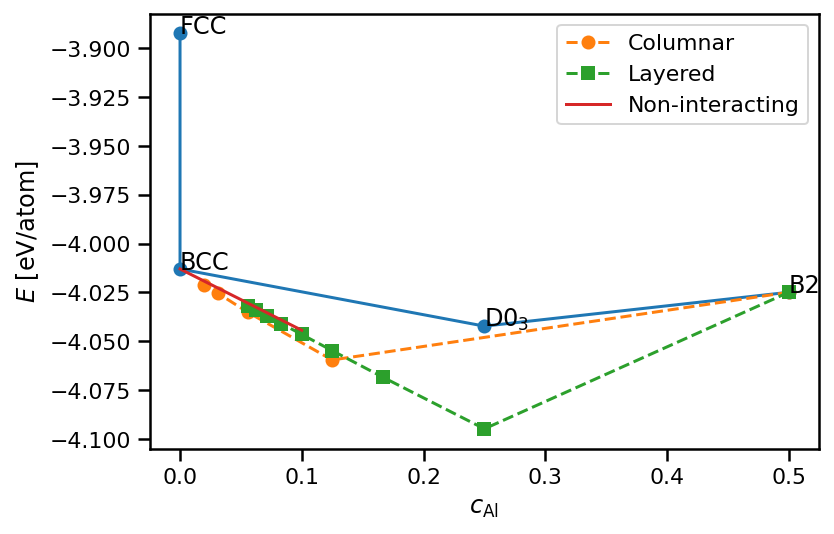

In [22]:
ax = pr.zerok.plot_phases_0K(relative=False)
ax.plot(columnar_c_Al, columnar_energy, label='Columnar', marker='o', linestyle='--')
ax.plot(layered_c_Al, layered_energy, label='Layered', marker='s', linestyle='--')
ax.plot(dilute_conc, dilute_energy, label='Non-interacting', linestyle='-')
plt.legend()
plt.show();

# Conclusion

This potential is just never going to show us proper D03 short range ordering, it's simply significantly unfavourable compared to columnar and planar configurations of Al. It's been a fun ride, but without doing some finite-T DFT or finding a better potential I don't see a way to directly contribute to FeAl SRO.